#Yolov4 (darknet) 範例  
歐尼克斯實境互動工作室 OmniXRI Jack, 2021.5.19  
參考來源：https://github.com/AlexeyAB/darknet  
如何訓練自定義物件：https://github.com/AlexeyAB/darknet#how-to-train-to-detect-your-custom-objects

#1. 驗證Nvidia GPU及CUDA版本
確認運行環境（本步驟可略過）  
GPU每次配置可能不同，可能為 K80, T4, P100，記憶體大小可能會影響到後續訓練時Patch Size大小。  
若想要好一點的GPU則重覆斷開連線(Ctrl+M)再重新連線，直到出現期望的GPU出現，再進行下一個步驟。  

In [ ]:
!nvidia-smi
!/usr/local/cuda/bin/nvcc --version

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


#2. 連接Google Drvie
建立捷徑 /my_drive 指向已掛載之Google Drvie (/content/drive/MyDrive/)  

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

!ln -s /content/drive/MyDrive/ /my_drive

Mounted at /content/drive


#3. 上傳預訓練檔及資料集到Google Drive
若已完成下列步驟，下次重新運行程式時本步驟可忽略不執行。 
1.   手動在Google Drive上建立一個 yolov4 檔案夾。  
2.   從 https://github.com/AlexeyAB/Darknet#pre-trained-models 下載 yolov4.weight(252MB)預訓練檔到自己的電腦。
3.   將 yolov4.weight 上傳到Google Drive的 yolov4 檔案夾中。  

若想訓練自定義物件，則需將自定義資料集及相關組態檔上傳到 yolov4 檔案夾中，包含下列六種檔案。更完整檔案修正方式請參考步驟8。  
1.   obj.data （物件資料設定）
2.   obj.names （物件類別名稱）
3.   yolov4.cfg （設定模型組態）
4.   train.txt （訓練內容，另含原始影像檔案壓縮檔）
5.   valid.txt （驗證內容，另含原始影像檔案壓縮檔）
6.   pre-trained.weight （從 https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137 下載預訓練檔）  


In [ ]:
!ls /my_drive/yolov4

my_dataset.zip	my_test.txt	      my_yolov4_custom_last.weights
my_obj.data	my_train.txt	      yolov4.conv.137
my_obj.names	my_yolov4_custom.cfg  yolov4.weights


#4. 下載Yolov4 (darknet)

In [ ]:
!git clone https://github.com/AlexeyAB/darknet
!ls

Cloning into 'darknet'...
remote: Enumerating objects: 15043, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 15043 (delta 14), reused 24 (delta 10), pack-reused 15002
Receiving objects: 100% (15043/15043), 13.44 MiB | 24.15 MiB/s, done.
Resolving deltas: 100% (10212/10212), done.
darknet  drive	sample_data


#5. 修改Makefile參數
將GPU, CUDNN, CUDNN_HALF, OPENCV設為可用  
GPU=0 --> GPU=1  
CUDNN=0 --> CUDNN=1  
CUDNN_HALF=0 --> CUDNN_HALF=1  
OPENCV=0 --> OPENCV=1

In [ ]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/darknet


#6. 編譯darknet

In [ ]:
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:935:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1136:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
  

#7. 測試darknet編譯結果
1.   檢查目前工作路徑是否在 darknet 路徑
2.   執行darknet物件偵測推論，指定 data, config, weight, image 所在位置(darknet/data/ 路徑下有幾張jpg影像可供測試)。
3.   顯示結果影像predictions.jpg

3rdparty	DarknetConfig.cmake.in	json_mjpeg_streams.sh  scripts
backup		darknet_images.py	LICENSE		       src
build		darknet.py		Makefile	       vcpkg.json
build.ps1	darknet_video.py	net_cam_v3.sh	       video_yolov3.sh
cfg		data			net_cam_v4.sh	       video_yolov4.sh
cmake		image_yolov3.sh		obj
CMakeLists.txt	image_yolov4.sh		README.md
darknet		include			results
 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		          

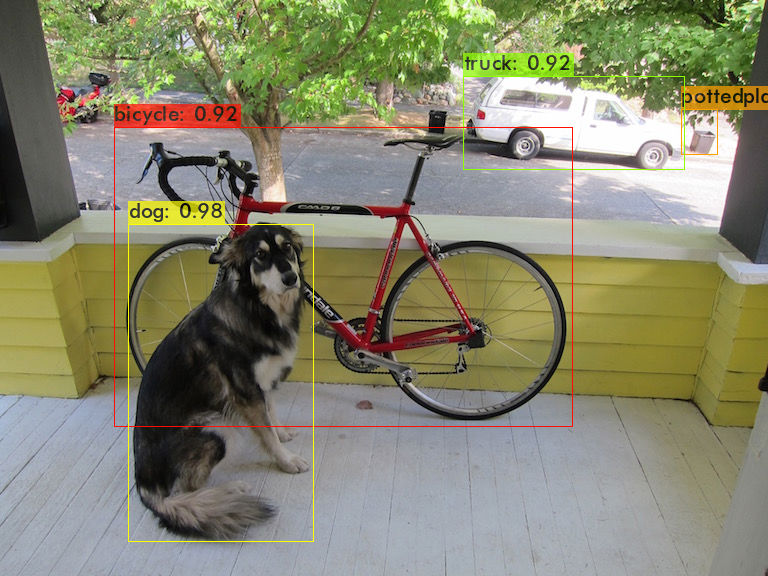

In [ ]:
!ls
!./darknet detector test cfg/coco.data cfg/yolov4.cfg /my_drive/yolov4/yolov4.weights  data/dog.jpg

import cv2 # 導入OpenCV函式庫
from google.colab.patches import cv2_imshow # 導入Colab.patches函式庫

imgResult = cv2.imread('predictions.jpg') # 讀入結果影像
cv2_imshow(imgResult) # 顯示結果影像

#8. 準備自己的資料集
1.   使用LabelImg標注工具製作符合YOLO格式 
2.   將步驟3準備好的相關設定及預訓練檔從 Google Drive  /yolov4 路徑下複製到Colab指定路徑下，包含下列六種檔案。  
    2.1   obj.data （物件資料設定）  
    2.2   obj.names （物件類別名稱）  
    2.3   yolov4.cfg （設定模型組態）  
    2.4   train.txt （訓練內容，另含原始影像壓縮檔）  
    2.5   valid.txt （驗證內容，另含原始影像壓縮檔）  
    2.6   pre-trained.weight （預訓練權重檔 yolov4.conv.137）  


In [ ]:
!pwd
!ls /my_drive/yolov4/

/content/darknet
my_dataset.zip	my_test.txt	      my_yolov4_custom_last.weights
my_obj.data	my_train.txt	      yolov4.conv.137
my_obj.names	my_yolov4_custom.cfg  yolov4.weights


In [ ]:
!cp /my_drive/yolov4/my_dataset.zip ../
!ls /content/

darknet  drive	my_dataset.zip	sample_data


In [ ]:
!unzip ../my_dataset.zip -d data/
!ls data/

Archive:  ../my_dataset.zip
   creating: data/my_dataset/
  inflating: data/my_dataset/img_001.jpg  
  inflating: data/my_dataset/img_001.txt  
  inflating: data/my_dataset/img_002.jpg  
  inflating: data/my_dataset/img_002.txt  
  inflating: data/my_dataset/img_003.jpg  
  inflating: data/my_dataset/img_003.txt  
  inflating: data/my_dataset/img_004.jpg  
  inflating: data/my_dataset/img_004.txt  
  inflating: data/my_dataset/img_005.jpg  
  inflating: data/my_dataset/img_005.txt  
  inflating: data/my_dataset/img_006.jpg  
 extracting: data/my_dataset/img_006.txt  
  inflating: data/my_dataset/img_007.jpg  
  inflating: data/my_dataset/img_007.txt  
  inflating: data/my_dataset/img_008.jpg  
  inflating: data/my_dataset/img_008.txt  
  inflating: data/my_dataset/img_009.jpg  
 extracting: data/my_dataset/img_009.txt  
  inflating: data/my_dataset/img_010.jpg  
  inflating: data/my_dataset/img_010.txt  
  inflating: data/my_dataset/img_011.jpg  
 extracting: data/my_dataset/img_011.tx

In [ ]:
!cp /my_drive/yolov4/my_yolov4_custom.cfg ./cfg
!ls cfg/

9k.labels				    resnet50.cfg
9k.names				    resnext152-32x4d.cfg
9k.tree					    rnn.cfg
alexnet.cfg				    rnn.train.cfg
cd53paspp-gamma.cfg			    strided.cfg
cifar.cfg				    t1.test.cfg
cifar.test.cfg				    tiny.cfg
coco9k.map				    tiny-yolo.cfg
coco.data				    tiny-yolo-voc.cfg
coco.names				    tiny-yolo_xnor.cfg
combine9k.data				    vgg-16.cfg
crnn.train.cfg				    vgg-conv.cfg
csdarknet53-omega.cfg			    voc.data
cspx-p7-mish.cfg			    writing.cfg
cspx-p7-mish_hp.cfg			    yolo.2.0.cfg
cspx-p7-mish-omega.cfg			    yolo9000.cfg
csresnext50-panet-spp.cfg		    yolo.cfg
csresnext50-panet-spp-original-optimal.cfg  yolov1
darknet19_448.cfg			    yolov2.cfg
darknet19.cfg				    yolov2-tiny.cfg
darknet53_448_xnor.cfg			    yolov2-tiny-voc.cfg
darknet53.cfg				    yolov2-voc.cfg
darknet.cfg				    yolov3_5l.cfg
densenet201.cfg				    yolov3.cfg
efficientnet_b0.cfg			    yolov3.coco-giou-12.cfg
efficientnet-lite3.cfg			    yolov3-openimages.cfg
enet-coco.cfg				    yolov3-spp.cfg
e

In [ ]:
!cp /my_drive/yolov4/my_obj.names ./data
!cp /my_drive/yolov4/my_obj.data ./data
!cp /my_drive/yolov4/my_train.txt ./data
!cp /my_drive/yolov4/my_test.txt ./data
!ls data/

9k.tree     giraffe.jpg		      labels	    my_train.txt
coco9k.map  goal.txt		      my_dataset    openimages.names
coco.names  horses.jpg		      my_obj.data   person.jpg
dog.jpg     imagenet.labels.list      my_obj.names  scream.jpg
eagle.jpg   imagenet.shortnames.list  my_test.txt   voc.names


In [ ]:
!cp /my_drive/yolov4/yolov4.conv.137 ./
!ls ./

3rdparty	DarknetConfig.cmake.in	json_mjpeg_streams.sh  results
backup		darknet_images.py	LICENSE		       scripts
build		darknet.py		Makefile	       src
build.ps1	darknet_video.py	net_cam_v3.sh	       vcpkg.json
cfg		data			net_cam_v4.sh	       video_yolov3.sh
cmake		image_yolov3.sh		obj		       video_yolov4.sh
CMakeLists.txt	image_yolov4.sh		predictions.jpg        yolov4.conv.137
darknet		include			README.md


In [ ]:
!ls ./

3rdparty		    darknet_images.py	   net_cam_v4.sh
backup			    darknet.py		   obj
build			    darknet_video.py	   predictions.jpg
build.ps1		    data		   README.md
cfg			    image_yolov3.sh	   results
chart_my_yolov4_custom.png  image_yolov4.sh	   scripts
chart.png		    include		   src
cmake			    json_mjpeg_streams.sh  vcpkg.json
CMakeLists.txt		    LICENSE		   video_yolov3.sh
darknet			    Makefile		   video_yolov4.sh
DarknetConfig.cmake.in	    net_cam_v3.sh	   yolov4.conv.137


#正常執行訓練  
指定.data, .cfg, 預訓練參數檔  

In [ ]:
!./darknet detector train data/my_obj.data cfg/my_yolov4_custom.cfg yolov4.conv.137 -dont_show

串流輸出內容已截斷至最後 5000 行。
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.759779), count: 10, class_loss = 0.809760, iou_loss = 2.037031, total_loss = 2.846791 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.661878), count: 6, class_loss = 0.206294, iou_loss = 0.152759, total_loss = 0.359053 
 total_bbox = 1059795, rewritten_bbox = 0.001038 % 

 999: 1.600551, 1.900751 avg loss, 0.000996 rate, 2.564639 seconds, 63936 images, 5.818678 hours left
Loaded: 0.000047 seconds
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.726031), count: 25, class_loss = 4.240381, iou_loss = 18.100405, total_loss = 22.340786 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.720767), count: 58, class_loss = 3.600100, iou_loss = 11.066990, total_loss = 14.667089 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.663618), count: 17, class_loss = 

#重新接續執行訓練  
從Google Drive中把最後一次權重檔 my_yolov4_custom_last.weights 複製到Colab /darknet/backup下  
再重新啟動訓練

In [ ]:
!cp /my_drive/yolov4/my_yolov4_custom_last.weights backup/
!ls backup/

my_yolov4_custom_last.weights


In [ ]:
!./darknet detector train data/my_obj.data cfg/my_yolov4_custom.cfg backup/my_yolov4_custom_last.weights -dont_show

串流輸出內容已截斷至最後 5000 行。
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.918511), count: 23, class_loss = 0.001126, iou_loss = 4.454027, total_loss = 4.455153 
 total_bbox = 3589637, rewritten_bbox = 0.001031 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.855624), count: 13, class_loss = 0.572918, iou_loss = 17.090580, total_loss = 17.663498 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.893829), count: 54, class_loss = 0.515721, iou_loss = 23.417910, total_loss = 23.933630 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.889517), count: 26, class_loss = 0.001031, iou_loss = 2.810289, total_loss = 2.811321 
 total_bbox = 3589730, rewritten_bbox = 0.001031 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.889262), count: 9, class_loss = 0.781398, iou_loss = 14.815893, total_loss = 15.597291 
v3 (iou loss, Normal

#測試訓練結果  

In [ ]:
./darknet detector test data/my_obj.data cfg/my_yolov4_custom.cfg /mydrive/yolov4/my_yolov4_custom_final.weights ./data/my_dataset/img_089.jpg -thresh 0.5


my_dataset.zip	my_test.txt	      my_yolov4_custom_last.weights
my_obj.data	my_train.txt	      yolov4.conv.137
my_obj.names	my_yolov4_custom.cfg  yolov4.weights
